<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import e

statsmodels: 
 http://www.statsmodels.org/stable/index.html  

PyMC3: (bayesian)  
https://docs.pymc.io/  

SymPy: symbolic math  
https://www.sympy.org/en/index.html  


#Sampling With Numpy random

In [ ]:
np.random.seed(0)
samples = np.random.normal(loc=100, scale=10, size=(2, 3))
samples = np.random.poisson(lam=10, size=(2, 2))
samples = np.random.randint(low=0, high=10, size=(2, 5))
samples = np.random.choice([1, 3, 4, -6], size=(2, 2))
# np.random.shuffle()

In [ ]:
#python stats toolbox

#T-Tests  


used to compare two mean (average) statistics and conclude whether they are different enough from each other.  

Independent samples t-tests (used to compare the means of two independent samples), paired sample t-tests (used to compare the means of the same group at different times), and one-sample t-tests (used to compare the mean of one group with a predetermined mean)

In [ ]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2, 1, size=20)

stats.ttest_ind(samples_a, samples_b).pvalue

0.21192162396428862

#Functions:  


Families - constant, linear, polynomial, log, exp  

A root of a function is a value belonging to its domain that makes the output equal to zero. The process of finding all roots of a function f(x) is equivalent to solving the equation f(x) = 0.  

Given a graph on a two-dimensional plane, if, for every vertical line (every line that is parallel to the y axis), the graph has more than one intersection, then it is not the plot of a valid function.  

Domain, the range, the vertical line test.  

An equation is formed when a function is assigned the value 0 and we are asked to find the values of the function input, normally x, that satisfy the equation.

In [ ]:
from sympy import Symbol
from sympy.solvers import solve
x = Symbol('x')
solve(x ** 3 - 7 * x ** 2 + 15 * x - 9, x)

[1, 3]

###Systems of Equations  
Operations:  
Swap the locations of any given two rows.  
Multiply a row by a non-zero constant.  
Add a row to any other row (potentially multiplied by a non-zero constant as well).  
*      
  
In this matrix notation, the vector x can be solved quite easily as x = A**-1 c, where A**-1 is the inverse matrix of A. An inverse matrix, M**-1, of any given matrix, M, is the matrix that satisfies the equation A A**-1 = I, where I is the identity matrix. The dot product between A-1 and c will give us a vector that makes up the solution of the system.



In [ ]:
from numpy.linalg import inv, LinAlgError
#takes in a two-dimensional NumPy array representing a matrix and returns the corresponding inverse matrix

In [ ]:
def solve_eq_sys(coeff_matrix, c):
    try:
        inv_matrix = inv(coeff_matrix)
        return inv_matrix.dot(c)
    except LinAlgError:
        return False

In [ ]:
#Non linear equations using  'solve for a variable in terms of another variable by transforming an equation)
#returns solution (x,y)
x = Symbol('x')
y = Symbol('y')

solve([x + y - 5, x ** 2 - x + 2 * y - 8],x, y)

[(1, 4), (2, 3)]

#Recursion

 Given the first three elements of the sequence, Pn, that is, P1=1, P2=7, and P3=2, find the next seven terms of the sequence that is recursively defined via the relation: Pn+3= (3*Pn+1 - Pn+2)/(Pn – 1) (n+ is subscript)

In [ ]:
def p_n(n):
    #( -1 makes our function bounded and protected from entering infinite loops and invalid input)
    if n < 1:
        return -1
    elif n == 1:
        return 1
    elif n == 2:
        return 7
    elif n == 3:
        return 2
    else:
        pn = (3*p_n(n-2) - p_n(n-1) )/ (p_n(n-3) + 1)
        return pn

In [ ]:
for i in range(1,11):
    print(p_n(i))

1
7
2
9.5
-0.4375
9.645833333333334
-1.0436507936507937
53.29982363315697
-5.30073825572847
-3784.586609737289


#Trigonometric Functions

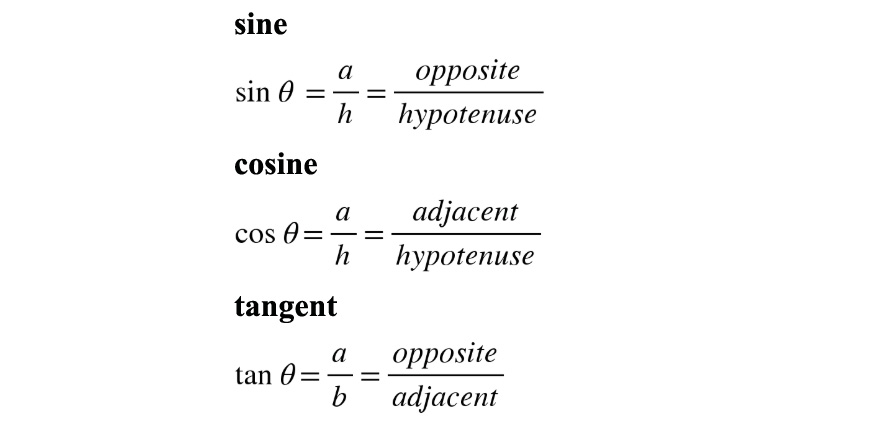

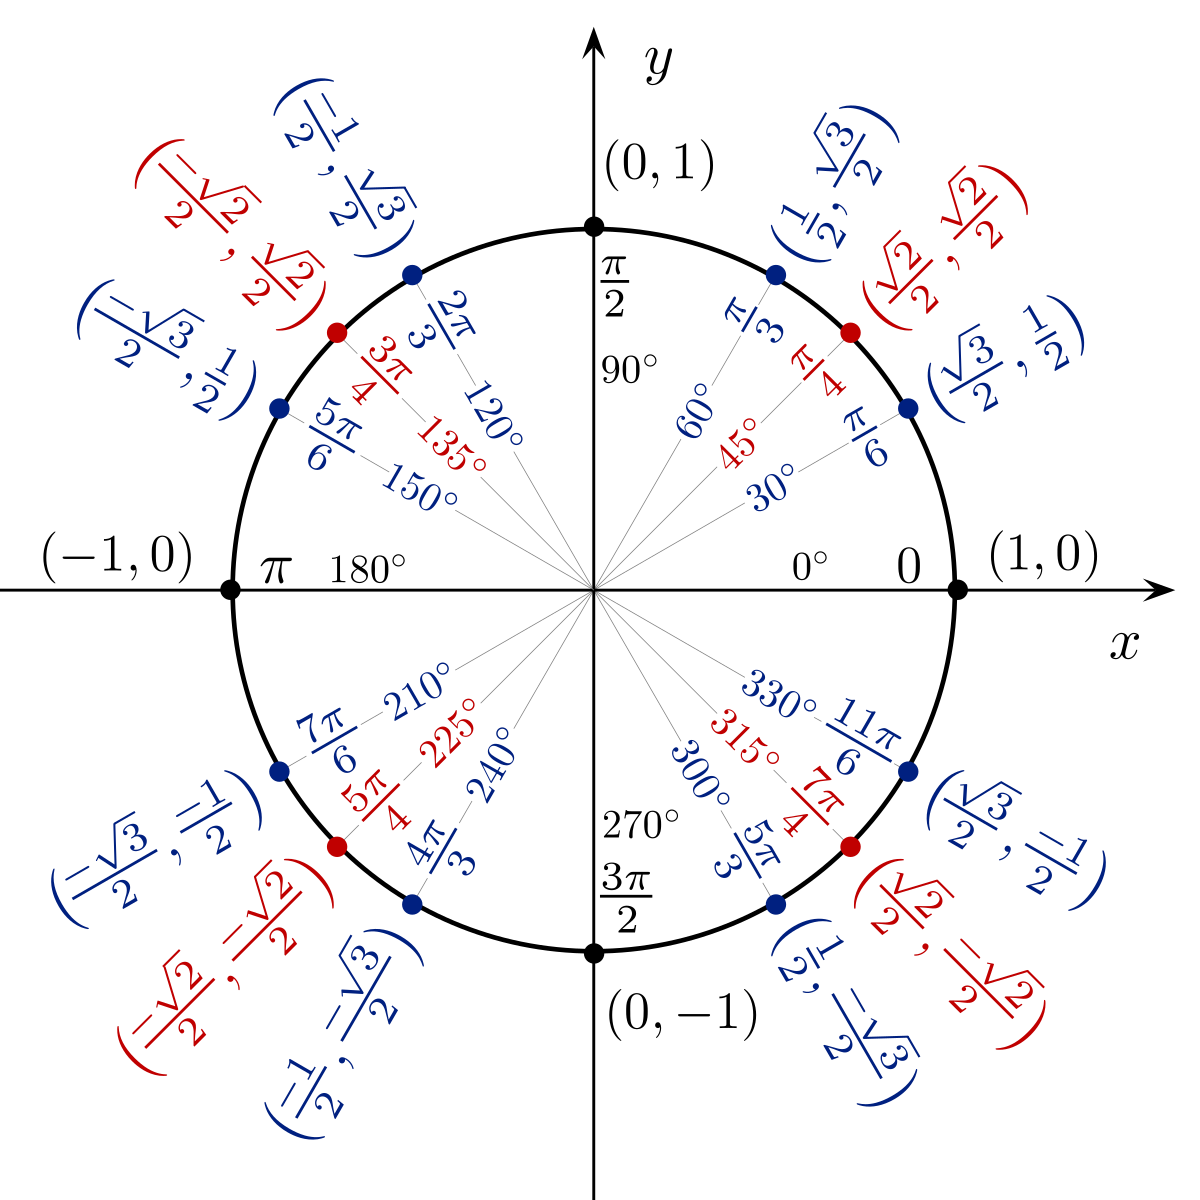

Adjacent is horizontal, Opposite is vertical (from right angle)  

Trigonometry is about studying triangles and, in particular, the relation of their angles to their edges. The ratio of two of the three edges (sides) of a triangle gives information about a particular angle, and to such a pair of sides, we give it a certain name and call it a function. 

tanθ = sinθ/cosθ  
inθ2 + cosθ2 = 1

In [ ]:
from math import sqrt
def hypotenuse(a,b):
    h = sqrt(a**2 + b**2)
    return h

In [ ]:
def find_hypotenuse(p1, p2):
    p3 = round( (p1**2 + p2**2)**0.5, 8)
    return p3

In [ ]:
def find_trig(adjacent, opposite, hypotenuse):
    '''Returns the tuple (sin, cos, tan)'''
    return opposite/hypotenuse, adjacent/hypotenuse, \
           opposite/adjacent

In [ ]:
p01 = 4
p02 = 4
print(find_trig(p01,p02,find_hypotenuse(p01,p02)))

(0.707106781123095, 0.707106781123095, 1.0)


Inverse trigonometric functions do the opposite: they admit a pure number as input and give an angle as output. So, if, for instance, a point, π, is mapped to point -1 (as the cos function does), then its inverse needs to do exactly the opposite. 

In [ ]:
from math import acos, asin, atan, cos
x = 0.5
print(acos(x))

1.0471975511965979


#Vectors

Vectors are abstract mathematical objects with a magnitude (size) and direction (orientation). A vector is represented by an arrow that has a base (tail) and a head. The head shows the direction of the vector, while the length of the arrow's body shows its magnitude.

Addition as the operation that results in vector C = A + B = (a1 + b1, a2 + b2, a3 + b3).  
Subtraction as the operation that results in vector C = A - B = (a1 - b1, a2 - b2, a3 - b3).  
Dot (or inner or scalar) product of the scalar C = b. b = a1 b1 + a2 b2 + a3 b3.  
Cross (or exterior) product of the vector C = A x B, which is perpendicular to the plane define by A and B and has elements (a2b3 - a3b2, a3b1 - a1b3, a1b2 – a2b1).  
Element-wise or Hadamard product of two vectors, A and B, is the vector, C, whose elements are the pairwise product of elements of A and B; that is, C = (a1 b1, a2 b2, a3 b3).  

If A and B are orthogonal, then the dot product vanishes:

In [ ]:
#To find the norm (magnitude) of each vector, we can use the following code:

A = np.array([2,10,0])
B = np.array([9,1,-1])

Amagn = np.sqrt(A.dot(A))
Bmagn = np.sqrt(B.dot(B))
#or
Amagn = np.linalg.norm(A)
Bmagn = np.linalg.norm(B)

print(Amagn, Bmagn)

10.198039027185569 9.1104335791443


In [ ]:
theta = acos(A.dot(B) / (Amagn * Bmagn))
print(theta)

1.2646655256233297


#Matrix

In [5]:
#np.ravel()
#np.identity()
#np.eye()

In [6]:
#Solve system of equations
# x,y,z as denominaitons spent
z = np.array([[37, 20, 12],\
              [15, 32, 4],\
              [5,  40, 2]])

#total spent
r = np.array([[435],[178],[70]])

#inverse and dot to solve
X = np.linalg.inv(z).dot(r)
print(X)

[[10.  ]
 [ 0.25]
 [ 5.  ]]


In [7]:
#shortcut
y = np.linalg.solve(z,r)
print(y)

[[10.  ]
 [ 0.25]
 [ 5.  ]]


#Markov chains 

Markov chains are one such model, in which the variable depending on the Markov property takes into account only the current state to predict the outcome of the next state.  

Stochastic versus Deterministic Models. Stochastic: many aspects cannot be determined and are then emulated based on their likelihood of happening.  
  
State Transition diagram:    
Unique keys as states, and show which states these words can transition to:

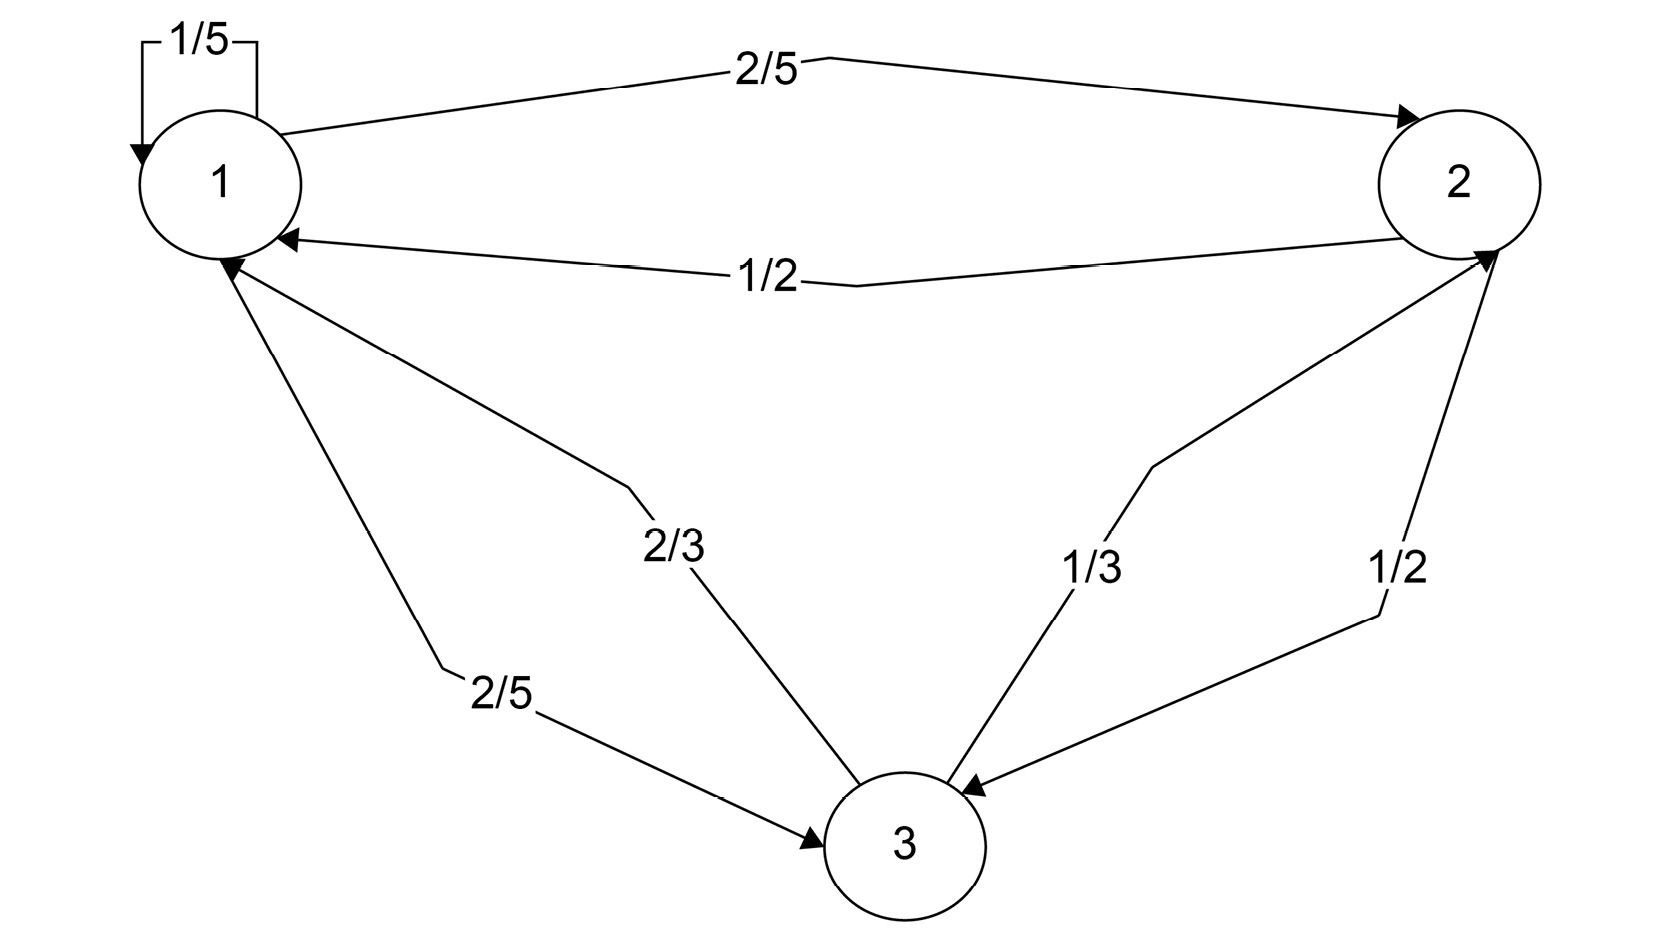

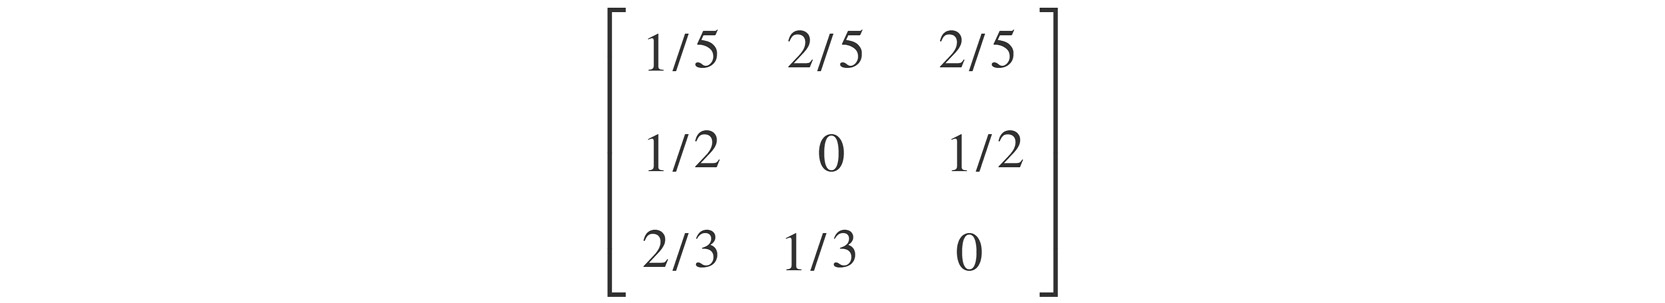

In [12]:
# Generate random letters from 4 states A B C D
import random
tokens = []
LEN_STR = 50
for i in range(LEN_STR):
    tokens.append(random.choice("ABCD"))
print(tokens)
LEN_TOKENS = len("ABCD")

['A', 'A', 'A', 'D', 'B', 'C', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'C', 'A', 'C', 'A', 'D', 'C', 'B', 'A', 'A', 'B', 'A', 'A', 'D', 'B', 'C', 'B', 'A', 'D', 'A', 'B', 'D', 'C', 'B', 'D', 'D', 'B', 'B', 'D', 'B', 'B', 'A', 'C', 'C', 'B']


In [13]:
# Finding the relative values with ordinal values of 
# ASCII characters
relative_value = [(ord(t) - ord('A')) for t in tokens]
print(relative_value)

[0, 0, 0, 3, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 1, 0, 3, 0, 1, 3, 2, 1, 3, 3, 1, 1, 3, 1, 1, 0, 2, 2, 1]


In [14]:
#create Matrix of zeros
m = [[0]*LEN_TOKENS for j in range(LEN_TOKENS)]
print(m)
# Building the frequency table(matrix) from the given data
for (i,j) in zip(relative_value, relative_value [1:]):
    m[i][j] += 1
print(list(zip(relative_value, relative_value [1:])))
print(m)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[(0, 0), (0, 0), (0, 3), (3, 1), (1, 2), (2, 0), (0, 1), (1, 2), (2, 0), (0, 2), (2, 1), (1, 0), (0, 2), (2, 2), (2, 1), (1, 2), (2, 0), (0, 2), (2, 0), (0, 3), (3, 2), (2, 1), (1, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 3), (3, 1), (1, 2), (2, 1), (1, 0), (0, 3), (3, 0), (0, 1), (1, 3), (3, 2), (2, 1), (1, 3), (3, 3), (3, 1), (1, 1), (1, 3), (3, 1), (1, 1), (1, 0), (0, 2), (2, 2), (2, 1)]
[[4, 3, 4, 4], [5, 2, 4, 3], [4, 6, 2, 0], [1, 4, 2, 1]]


In [15]:
# Finding the Probability
for state in m:
    total = sum(state)
    if total > 0:
        state[:] = [float(f)/sum(state) for f in state]
for state in m:
      print(state)

[0.26666666666666666, 0.2, 0.26666666666666666, 0.26666666666666666]
[0.35714285714285715, 0.14285714285714285, 0.2857142857142857, 0.21428571428571427]
[0.3333333333333333, 0.5, 0.16666666666666666, 0.0]
[0.125, 0.5, 0.25, 0.125]


In [ ]:
#use case
# Churchill's speech
churchill = open('churchill.txt').read()
keywords = churchill.split()
print(keywords)

keylist = []
for i in range(len(keywords)-1):
    keylist.append( (keywords[i], keywords[i+1]))
print(keylist)

# Create key-value pairs based on follow-up words
word_dict = {}
for beginning, following in keylist:
    if beginning in word_dict.keys():
        word_dict[beginning].append(following)
    else:
        word_dict[beginning] = [following]
print(word_dict)

first_word = np.random.choice(keywords)
while first_word.islower():
    first_word = np.random.choice(keywords)

word_chain = [first_word]

WORDCOUNT = 40
for i in range(WORDCOUNT):
    word_chain.append(np.random.choice(word_dict[\
                                       word_chain[-1]]))
    
    sentence = ' '.join(word_chain)
    print(sentence)

#Stats - Random, Binomial, Normal

###Randomness

EDA:  
Understanding the distributions of the variables  
Understanding the relationships between two or more variables  
Detecting patterns that can't be found using numerical calculations  
Spotting anomalies or outliers in the data  
Formulating a hypothesis about causal relationships
Informing us about how to engineer new variables (feature engineering)  
Informing us about possible formal inferential statistical tests  

In [17]:
np.random.seed(81)
one_million_tosses = np.random.randint(low=1, \
                                       high=7, size=int(1e6))

N_A_occurs = (one_million_tosses == 2).sum()
Prob_A = N_A_occurs/one_million_tosses.shape[0]
print(f'P(A)={Prob_A}')

P(A)=0.16595


0    0.612402
1    0.306383
2    0.070584
3    0.009630
4    0.000940
5    0.000056
6    0.000004
7    0.000001
dtype: float64


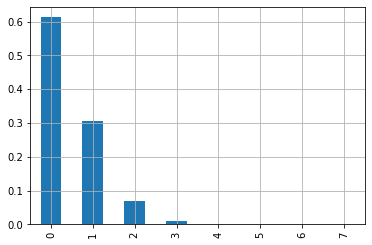

In [18]:
#experimental probability
np.random.seed(10)
n_boxes = int(1e6)
parts_per_box = 12
one_million_boxes = np.random.choice\
                    ([1, 0], \
                     size=(n_boxes, parts_per_box), \
                     p=(0.04, 0.96))
# count defective pieces per box
defective_pieces_per_box = one_million_boxes.sum(axis=1)
# count how many times we observed 0, 1,…, 12 defective pieces
defective_pieces_per_box = pd.Series(defective_pieces_per_box)
frequencies = defective_pieces_per_box.value_counts()
# probability distribution
probs_Z = frequencies/n_boxes
print(probs_Z.sort_index())
probs_Z.sort_index().plot(kind='bar')
plt.grid()

###Binomial  
2 outcomes, fixed num times, independent

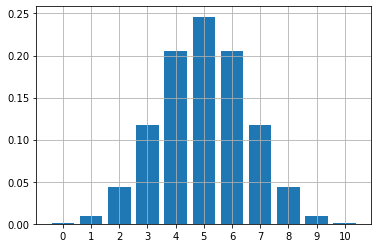

In [19]:
import scipy.stats as stats
Y_rv = stats.binom(
    n = 10, # number of coins
    p = 0.5 # probability of heads (success)
)

y_values = np.arange(0, 11)

Y_probs = Y_rv.pmf(y_values) 

fig, ax = plt.subplots()
ax.bar(y_values, Y_probs)
ax.set_xticks(y_values)
ax.grid()

###Continuous Random - NORMAL

In a more precise sense, the PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable's PDF over that range—that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to 1.

In [6]:
# set the mu and sigma parameters of the distribution
heights_mean = 170
heights_sd = 10
# instantiate the random variable object
heights_rv = stats.norm(
        loc = heights_mean, # mean of the distribution
        scale = heights_sd  # standard deviation
)

heights_rv.pdf(190)

# To be clear, this is not the probability of observing a 
# male whose height is 175 cm (remember that the probability 
# of this variable taking a specific value should be zero)
#relative vs absolute likelihood

0.005399096651318806

In [5]:
# size of the simulation
sim_size = int(1e5)
# simulate the random samples
sample_heights = heights_rv.rvs\
                 (size = sim_size,\
                  random_state = 88) # similar to np.seed)
Prob_event = (sample_heights > 190).sum()/sim_size
print(f'Probability of a male > 190 cm: {Prob_event:0.5f} \
 (or {100*Prob_event:0.2f}%)')

Probability of a male > 190 cm: 0.02303  (or 2.30%)


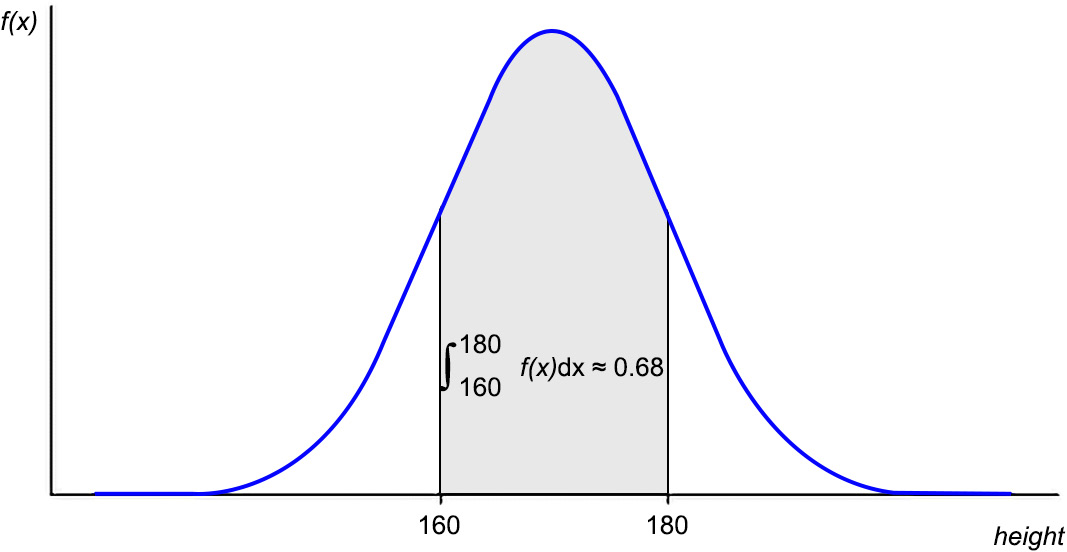

In [7]:
# limits of the integral
lower_lim = 160
upper_lim = 180
# calculating the area under the curve
Prob_X_in_160_180 = heights_rv.cdf(upper_lim) - \
                    heights_rv.cdf(lower_lim)
# print the result
print(f'Prob(160 <= X <= 180) = {Prob_X_in_160_180:0.4f}')

Prob(160 <= X <= 180) = 0.6827


#Stats - Central Limit, Confidence, Hypothesis

###Law Large Numbers

In [10]:
import random
random.seed(54321)
# set the number of games of roulette you want to play
sample_size = 10
#set the amount of money you want to bet
bet = 1
# initialize the variables required for our loop
# 1 to 36 represent numbers on roulette wheel, 37 represents 0, 38 represents 00
net_money = 0
wins = 0
money_track = []
trials_track = []
# create a for loop and collect the results in a list
for i in range(1,sample_size+1):
    result = random.randint(1,38)
    if result % 2 == 1 and result != 37:
        net_money += bet
        wins += 1
    else:
        net_money -= bet
    money_track.append(net_money/i)
    trials_track.append(i)

# print the results
print(f'Results: You won {wins} games out of\
{sample_size} and won an average of\
{net_money/sample_size} dollars per game')
print(f'Results: You are expected to win\
{((18/38)*bet+(20/38)*(-bet))} per game')

Results: You won 4 games out of10 and won an average of-0.2 dollars per game
Results: You are expected to win-0.05263157894736842 per game


###Central Limit

The central limit theorem (CLT) states that if we have a large enough sample size, the distribution of the sample mean is approximately normal, with a mean of the population mean and a standard deviation of the population standard deviation divided by the square root of n. This is important because not only do we know the typical value that our population mean can take, but we know the shape and variance of the distribution as well.

###Confidence Interval

More generally, a confidence interval is a range of values for a statistic (an example of a statistic is a sample mean) based on a distribution that has some degree of confidence of how likely it is to contain the true value for the mean.

The first type of confidence interval we will calculate is a z-confidence interval, which will give us an interval (or range) of values for our sample mean based on the standard normal model (sometimes referred to as a z-distribution).

In [12]:
def z_confidence_interval(data, st_dev, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    n = len(data)
    #Percent Point Function (PPF), which is the inverse of the CDF.
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = sample_mean - (crit_value * \
                                 (st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * \
                                  (st_dev / math.sqrt(n)))
    print (f'Your {con_lvl} z confidence interval is ({lower_limit}, {higher_limit})')
    return (lower_limit,higher_limit)

In [20]:
import random
random.seed(39809)

sample_list = []
for i in range(30):
    sample_list.append(random.randint(0, 10))
z_confidence_interval(sample_list,2.89,0.95)

Your 0.95 z confidence interval is (3.965845784931483, 6.034154215068517)


(3.965845784931483, 6.034154215068517)

 t-confidence interval (less than 30)  

 The t-confidence interval does not assume that you know the population standard deviation, so we use the sample standard deviation.  
 
It uses the t-distribution to calculate the critical value rather than the z (standard normal) distribution. The difference between the two is that the t-distribution is less concentrated around the mean to account for not knowing the population standard deviation.  


In [22]:
def t_confidence_interval(data, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    sample_st_dev = st.stdev(data)
    n = len(data)
    crit_value = sp.t.ppf(((1 - con_lvl) / 2) + \
                          con_lvl, n-1)
    lower_limit = sample_mean - (crit_value * \
                  (sample_st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * \
                   (sample_st_dev/math.sqrt(n)))
    print(f'Your {con_lvl} t confidence interval is ({lower_limit},{higher_limit})')
    return (lower_limit,higher_limit)

Calculate a confidence interval for a proportion

In [23]:
def prop_confidenct_interval(p_hat, n, con_lvl):
    import math
    import scipy.stats as sp
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = p_hat - (crit_value * (math.sqrt(\
                 (p_hat * (1-p_hat)) / n)))
    higher_limit = p_hat + (crit_value * (math.sqrt(\
                  (p_hat * (1 - p_hat)) / n)))
    print(f'Your {con_lvl} proportional confidence interval is ({lower_limit},{higher_limit})')
    return (lower_limit,higher_limit)

In [24]:
prop_confidenct_interval(0.54,350, 0.95)

Your 0.95 proportional confidence interval is (0.4877856513683282,0.5922143486316719)


(0.4877856513683282, 0.5922143486316719)

The margin of error is the distance from our point estimator (p̂ in this example) and either boundary (since the confidence interval is symmetrical; it does not matter whether we use the upper or lower bound). For this poll, our margin of error would be 0.592 - 0.54 = 0.052.

###Hypothesis Test

A hypothesis test is a statistical test that is designed to determine whether a statistic is significantly different from what we expect. Examples of hypothesis tests include checking to see whether the sample mean is significantly different from a pre-established standard or compare two different samples to see whether they are statistically different or the same.  

Is it significant or attributable to random variance?

In [26]:
import scipy.stats as st
import numpy as np
import pandas as pd
import math as mt
import statistics as stat
import statsmodels.stats.weightstats as mod
import statsmodels.stats.proportion as prop
np.random.seed(12345)

def z_test(sample, pop_st_dev, hypoth_value, sig_level, test_type):
    sample_mean = stat.mean(sample)
    sample_size = len(sample)
    test_statistic = (sample_mean - hypoth_value) / \
                     (pop_st_dev / (mt.sqrt(sample_size)))
    if test_type == 'lower':
        p_value = st.norm.cdf(test_statistic)
    if test_type == 'upper':
        p_value = 1 - st.norm.cdf(test_statistic)
    if test_type == 'two':
        p_value = 2 * (1 - st.norm.cdf(abs(test_statistic)))
    print(f'P Value = {p_value}')
    if p_value < sig_level:
        print(f'Results are significant. Reject the Null')
    else:
        print(f'Results are insignificant. ''Do Not Reject the Null')

In [27]:
# 1 - Lower Tailed Test
# Randomly Sample from Normal Distribution mu=     and st_dev = 3
data1 = np.random.normal(15, 1, 50)
# Test to see if Mean is significantly less then 16
print(f'Sample mean: {stat.mean(data1)}')
z_test(data1,1,16,0.05,'lower')
# most of the time, the null should be rejected

Sample mean: 14.94804802516884
P Value = 5.094688086201483e-14
Results are significant. Reject the Null


In [30]:
#z-test for proportion (assumes pop std)
#numerb of successes, sample size, hypothetical value
# ['smaller','larger','two-sided']
# random sample, independence, and at least 10 successes and 10 failures
results = prop.proportions_ztest(193,350,.50, alternative='larger')
print(results)

(1.93454148164361, 0.026523293494118718)


In [31]:
def t_test(sample, hypoth_value, sig_level, test_type):
    sample_mean = stat.mean(sample)
    sample_st_dev = stat.stdev(sample)
    sample_size = len(sample)
    test_statistic = (sample_mean - hypoth_value) / \
                     (sample_st_dev/(mt.sqrt(sample_size)))
    if test_type == 'lower':
        p_value = st.t.cdf(test_statistic,df=sample_size-1)
    if test_type == 'upper':
        p_value = 1 - st.t.cdf(test_statistic,df=sample_size-1)
    if test_type == 'two':
        p_value = 2 * (1 - st.t.cdf(abs(test_statistic), \
                                    df=sample_size-1))
    print(f'P Value = {p_value}')
    if p_value < sig_level:
        print(f'Results are significant.  Reject the Null')
    else:
        print(f'Results are insignificant. '\
               'Do Not Reject the Null')

###A/B Test

For the 2-sample t-test, the null hypothesis will always be set to 0 (u1 -u2 = 0). In other words, the null hypothesis is saying that there is no difference between the two means, and the other is saying that there is a difference.

In [33]:
import scipy.stats as st

# Randomly Sample from Normal Distributions 
np.random.seed(16172)
sample1 = np.random.normal(50, 10, 100)
sample2 = np.random.normal(100,10,100)

two_tail_results = st.ttest_ind(sample1, sample2, \
                                equal_var=False)
print(two_tail_results)

Ttest_indResult(statistic=-33.72952277672986, pvalue=6.3445365508664585e-84)


If we wanted to do a lower-tailed test (where the mean of sample 1 is significantly less than sample 2), we would use the same code. The only difference is that we would divide the p-value by 2 and check to see whether our test statistic is negative.  

If we want to test whether the mean of sample 2 is significantly greater than the mean of sample 1, we just switch the position of sample 1 and sample 2 in the function. Just like with the lower-tailed test, we would divide the p-value by 2. However, we would check to see that the test statistic is positive.